_____

<center><h1>Introduction to Data Science</h1></center>

<center><a target="_blank" href="https://learning.constructor.org/"><img src="https://drive.google.com/uc?id=1wxkbM60NlBlkbGK1JqUypKL24RrTiiYk" width="200" style="background:none; border:none; box-shadow:none;" /></a> </center>

<p style="margin-bottom:1cm;"></p>

_____

<center> <h2> Workshop  </h2> </center>

<p style="margin-bottom:1cm;"></p>

_____

<center>Constructor Learning, 2023</center>

_____


Welcome to this Data Analytics workshop! We hope you enjoy it, but most importantly have fun.

Here's what we will cover today:

- Data Science Lifecycle
- Data Wrangling
- Exploratory Data Analysis
- Intro to Machine Learning

---
First let's talk about the lifecycle of a Data Science project.



<a target="_blank" href="https://learn.microsoft.com/en-us/azure/architecture/data-science-process/lifecycle"><img src="https://learn.microsoft.com/en-us/azure/architecture/data-science-process/media/lifecycle/tdsp-lifecycle2.png" width="800" style="background:none; border:none; box-shadow:none;" /></a>

<center><h1>Live Coding</h1></center>

This is a copy notebook (file) of the original version. For your progress to be saved, you can go to `File` and then `Save a copy in Drive`. This is optional

---
### How are we going to start our workshop fun?? 🐍

The most popular programming language used in Data Science is [Python](https://www.python.org/). It is one of the most accessible yet very powerful programming languages available. It has a simplified syntax, which gives emphasis on natural language, making it easier to learn and read.

But a programming languages needs a place to be written and executed. Just like we need Google Docs to write a novel, we need a [Colab Notebook](https://research.google.com/colaboratory/faq.html) (Or Jupyter Notebook) to write our amazing code. That is precisely what you are using right now on your browser, a computational web session that allows you to input and output pyhton code.

It makes the job of exploring data a lot more fun! Let's get started!

# Load Dependencies

---
Python code is very powerful, but there are many operations that can get tedious if we were to code them ourselves. 

That is why several amazing authors all over the world have created libraries that help us perform specific tasks more efficiently and with less lines of code.

For this workshop we will use the following libraries:
- **Pandas**: the most important tool of a Data Scientist. It offers many tools for data manipulation and analysis.
- **Plotly**: an interacting graphing library that allows us to plot the data and create visuals.
- **Scikit-Learn**: Simple and efficient tools for predictive data analysis Accessible to everybody, and reusable in various contexts.

In [ ]:
# Some libraries do not come preinstalled in Google Colab, so we need to manually install 
# them using the next line of code.
!pip install pgeocode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pgeocode

import plotly.express as px
import plotly.graph_objects as go

# Data Wrangling

## Load Dataset

---
Data can come from many different sources, and depending on the format it is in, the way to import it will vary. In the case of the "Swiss Housing Prices dataset"*, the data is stored in Google Drive as a `.csv` file. The next block of code will load the data to the notebook into a Pandas DataFrame object.

\*Data scraped by [Ansam Zedan](https://www.linkedin.com/in/ansam-zedan/) on the Homegate.ch website.

In [ ]:
# Read the home price csv file from the URL
orig_url = "https://drive.google.com/file/d/14a0l9bT9DLFqIu5rtyiTc9hLC555rvOz/view?usp=sharing"
file_id = orig_url.split('/')[-2]
data_path='https://drive.google.com/uc?export=download&id=' + file_id

df = pd.read_csv(data_path, index_col=0)
df

,price,type,room_num,floor,area_m2,floors_num,year_built,last_refurbishment,address
0,"CHF1,235,000.–",Apartment,2.5,GF,138 m2,4.0,2015.0,2018.0,8914 Aeugst am Albis
1,"CHF650,000.–",Apartment,4.5,1,121 m2,NaN,1987.0,2021.0,"Via Vecchio Canale 2, 6982 Agno"
2,"CHF1,062,900.–",Apartment,2.5,1,63 m2,NaN,NaN,NaN,"Via Campione, 6816 Bissone"
3,"CHF1,125,500.–",Attic flat,2.5,3,63 m2,NaN,NaN,NaN,"Via Campione, 6816 Bissone"
4,"CHF2,180,700.–",Apartment,3.5,2,125 m2,NaN,NaN,NaN,"Via Campione, 6816 Bissone"
...,...,...,...,...,...,...,...,...,...
2181,"CHF695,000.–",Bifamiliar house,4.5,NaN,144 m2,NaN,2022.0,NaN,1994 Aproz (Nendaz)
2182,"CHF695,000.–",Bifamiliar house,4.5,NaN,144 m2,NaN,2022.0,NaN,1994 Aproz (Nendaz)
2183,"CHF695,000.–",Row house,4.5,NaN,144 m2,NaN,2022.0,NaN,1994 Aproz (Nendaz)
2184,"CHF695,000.–",Bifamiliar house,4.5,NaN,144 m2,NaN,2022.0,NaN,1994 Aproz (Nendaz)


---
The first method we will use on our newly created dataframe is `.info()`. Here we can get a first overview of the types of data we have, and if we have missing values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2186 entries, 0 to 2185
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               2186 non-null   object 
 1   type                2186 non-null   object 
 2   room_num            2072 non-null   float64
 3   floor               928 non-null    object 
 4   area_m2             2021 non-null   object 
 5   floors_num          713 non-null    float64
 6   year_built          1652 non-null   float64
 7   last_refurbishment  489 non-null    float64
 8   address             2186 non-null   object 
dtypes: float64(4), object(5)
memory usage: 170.8+ KB


---
The price column is formatted with alphanumeric values. In order to properly do data exploration, we need to treat this column as an integer (number), so let's clean this entries using a Regular Expression (regex) so it only keeps the digits

In [ ]:
df["price"]

0       CHF1,235,000.–
1         CHF650,000.–
2       CHF1,062,900.–
3       CHF1,125,500.–
4       CHF2,180,700.–
             ...      
2181      CHF695,000.–
2182      CHF695,000.–
2183      CHF695,000.–
2184      CHF695,000.–
2185      CHF695,000.–
Name: price, Length: 2186, dtype: object

In [ ]:
df["price"].sample(n=10).unique()

array(['CHF1,595,000.–', 'CHF790,000.–', 'CHF1,390,000.–',
       'CHF3,450,000.–', 'CHF515,000.–', 'CHF760,000.–', 'CHF3,650,000.–',
       'CHF725,000.–', 'CHF1,370,000.–', 'CHF715,000.–'], dtype=object)

In [ ]:
df['price'] = df['price'].str.replace('[^0-9]', '')
df.head()

<ipython-input-7-469ffdf03e6c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['price'] = df['price'].str.replace('[^0-9]', '')


,price,type,room_num,floor,area_m2,floors_num,year_built,last_refurbishment,address
0,1235000,Apartment,2.5,GF,138 m2,4.0,2015.0,2018.0,8914 Aeugst am Albis
1,650000,Apartment,4.5,1,121 m2,NaN,1987.0,2021.0,"Via Vecchio Canale 2, 6982 Agno"
2,1062900,Apartment,2.5,1,63 m2,NaN,NaN,NaN,"Via Campione, 6816 Bissone"
3,1125500,Attic flat,2.5,3,63 m2,NaN,NaN,NaN,"Via Campione, 6816 Bissone"
4,2180700,Apartment,3.5,2,125 m2,NaN,NaN,NaN,"Via Campione, 6816 Bissone"


---
Now we have only numeric values for the price column, but will it be treated as an integer, or will Pandas still interpret it as a string?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2186 entries, 0 to 2185
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               2186 non-null   object 
 1   type                2186 non-null   object 
 2   room_num            2072 non-null   float64
 3   floor               928 non-null    object 
 4   area_m2             2021 non-null   object 
 5   floors_num          713 non-null    float64
 6   year_built          1652 non-null   float64
 7   last_refurbishment  489 non-null    float64
 8   address             2186 non-null   object 
dtypes: float64(4), object(5)
memory usage: 170.8+ KB


---
Even though we stripped the values of non-numerical characters, we still need to convert the data type so it can be interpreted as an integer. This way we can later take advantage of this for plotting and applying methods if needed.

In [ ]:
df['price'] = df['price'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2186 entries, 0 to 2185
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               2186 non-null   int64  
 1   type                2186 non-null   object 
 2   room_num            2072 non-null   float64
 3   floor               928 non-null    object 
 4   area_m2             2021 non-null   object 
 5   floors_num          713 non-null    float64
 6   year_built          1652 non-null   float64
 7   last_refurbishment  489 non-null    float64
 8   address             2186 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 170.8+ KB


---
Another column which should be numerical but it's being treated as an object (string) is the "area_m2" column. In this case it would be beneficial to also strip the "m2" out of the values and only keep the numbers.



In [ ]:
df.head(3)

,price,type,room_num,floor,area_m2,floors_num,year_built,last_refurbishment,address
0,1235000,Apartment,2.5,GF,138 m2,4.0,2015.0,2018.0,8914 Aeugst am Albis
1,650000,Apartment,4.5,1,121 m2,NaN,1987.0,2021.0,"Via Vecchio Canale 2, 6982 Agno"
2,1062900,Apartment,2.5,1,63 m2,NaN,NaN,NaN,"Via Campione, 6816 Bissone"


In [ ]:
"138 m2 more things".split(" ")

['138', 'm2', 'more', 'things']

In [ ]:
df['area_m2'] = df['area_m2'].str.split(' ').str[0]
df['area_m2'] = df['area_m2'].astype(float)
df.head(3)

,price,type,room_num,floor,area_m2,floors_num,year_built,last_refurbishment,address
0,1235000,Apartment,2.5,GF,138.0,4.0,2015.0,2018.0,8914 Aeugst am Albis
1,650000,Apartment,4.5,1,121.0,NaN,1987.0,2021.0,"Via Vecchio Canale 2, 6982 Agno"
2,1062900,Apartment,2.5,1,63.0,NaN,NaN,NaN,"Via Campione, 6816 Bissone"


---
When working with data, many times there will be missing values in some of the samples. This is a normal situation to encounter when analyzing the data and emphasizes the importance of knowing the data. 

There are several approaches to deal with missing values:
- Substitute the missing values with the mean, median, mode or arbitrary value.
- Drop the samples with missing data.
- Impute the missing values using Machine Learning.

---
The column "floors_num" indicates the number of floors that the property has. There are many entries with missing values in this column. We can inspect the data to make a more educated inference of which value to assign to the rows with missing data.

We can do this by visualizing the counts of each type of property and seeing that most of the properties with missing values are apartments, which most of the time only have one floor.

In [ ]:
print(f"Missing values in 'floors_num': {df['floors_num'].isna().sum()}")

Missing values in 'floors_num': 1473


In [ ]:
def get_type_proportion(request):
    if request == "Is Nan":
        conditional = df['floors_num'].isna()
    elif request == "1":
        conditional = df['floors_num'] == 1
    elif request == "More than 1":
        conditional = df['floors_num'] > 1

    s1 = df[conditional]['type'].value_counts()[0:5].sort_index()
    s2 = pd.Series([df[conditional]['type'].value_counts()[5:].sum()], index=["Other"])
    return pd.concat([s1, s2], ignore_index=False)

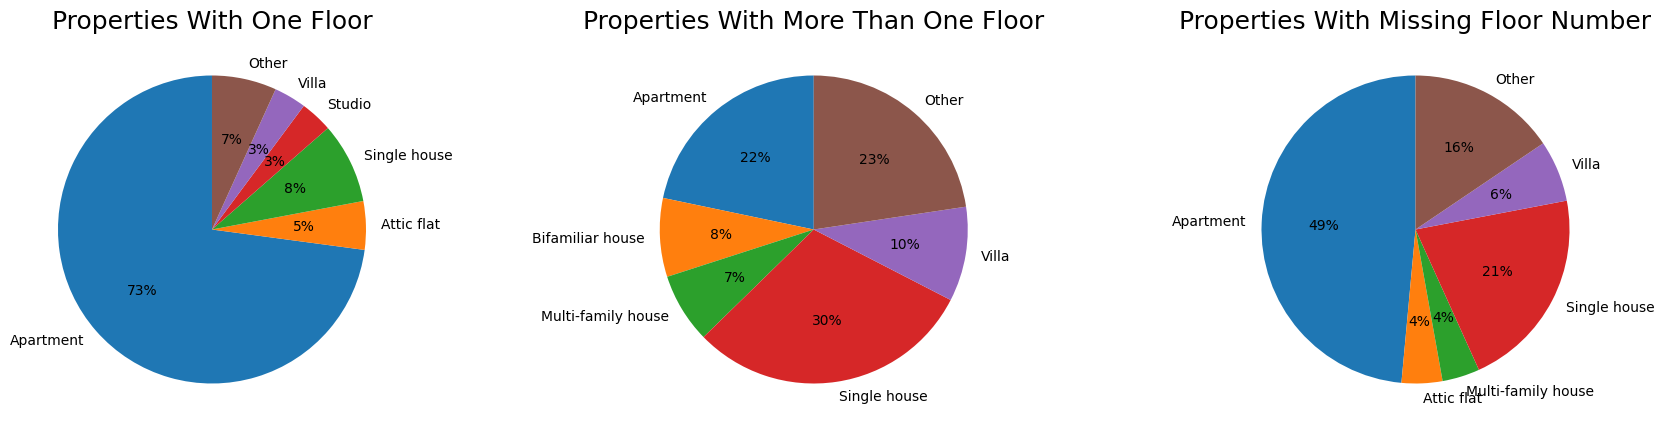

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(22,5))

inspect_df = get_type_proportion("1")
ax[0].pie(inspect_df, labels=inspect_df.index, autopct='%1.f%%', startangle=90)
ax[0].set_title("Properties With One Floor", fontsize=18)

inspect_df = get_type_proportion("More than 1")
ax[1].pie(inspect_df, labels=inspect_df.index, autopct='%1.f%%', startangle=90)
ax[1].set_title("Properties With More Than One Floor", fontsize=18)

inspect_df = get_type_proportion("Is Nan")
ax[2].pie(inspect_df, labels=inspect_df.index, autopct='%1.f%%', startangle=90)
ax[2].set_title("Properties With Missing Floor Number", fontsize=18)

fig.show();

---
Looking at the distribution of the types of properties according to the amount of floor levels they have, we can make the following assumption: properties with one floor level are mostly Apartments (73%), so since the majority of properties missing this value are also Apartments (49%), it's more likely that they also have one floor level.

In [ ]:
df['floors_num'] = df['floors_num'].fillna(1).astype(int)
df.head()

,price,type,room_num,floor,area_m2,floors_num,year_built,last_refurbishment,address
0,1235000,Apartment,2.5,GF,138.0,4,2015.0,2018.0,8914 Aeugst am Albis
1,650000,Apartment,4.5,1,121.0,1,1987.0,2021.0,"Via Vecchio Canale 2, 6982 Agno"
2,1062900,Apartment,2.5,1,63.0,1,NaN,NaN,"Via Campione, 6816 Bissone"
3,1125500,Attic flat,2.5,3,63.0,1,NaN,NaN,"Via Campione, 6816 Bissone"
4,2180700,Apartment,3.5,2,125.0,1,NaN,NaN,"Via Campione, 6816 Bissone"


---
The "floor" column which represents the level the property is located at also has several missing values. We will infer that no given data means it is a Ground Floor property.

In [ ]:
print(f"Missing values in 'floor': {df['floor'].isna().sum()}")

Missing values in 'floor': 1258


In [ ]:
# EXERCISE 1
# Fill the missing values of the 'floor' column with "GF"
df['floor'] = df['floor'].fillna("GF") #<-- Your code here
df.tail()

,price,type,room_num,floor,area_m2,floors_num,year_built,last_refurbishment,address
2181,695000,Bifamiliar house,4.5,GF,144.0,1,2022.0,NaN,1994 Aproz (Nendaz)
2182,695000,Bifamiliar house,4.5,GF,144.0,1,2022.0,NaN,1994 Aproz (Nendaz)
2183,695000,Row house,4.5,GF,144.0,1,2022.0,NaN,1994 Aproz (Nendaz)
2184,695000,Bifamiliar house,4.5,GF,144.0,1,2022.0,NaN,1994 Aproz (Nendaz)
2185,695000,Bifamiliar house,4.5,GF,144.0,1,2022.0,NaN,1994 Aproz (Nendaz)


---
For the "last_refurbishment" column, which states the year of the last remodeling, there are also missing values. We will infer that this is because the building has not been refurbished since its construction, and it makes sense to set the date as the year which it was built.

In [ ]:
print(f"Missing values in 'last_refurbishment': {df['last_refurbishment'].isna().sum()}")

Missing values in 'last_refurbishment': 1697


In [ ]:
df["year_built"]

0       2015.0
1       1987.0
2          NaN
3          NaN
4          NaN
         ...  
2181    2022.0
2182    2022.0
2183    2022.0
2184    2022.0
2185    2022.0
Name: year_built, Length: 2186, dtype: float64

In [ ]:
# EXERCISE 2
# Fill the missing values in the column 'last_refurbishment' with the values from the column 'year_built'
df['last_refurbishment'] = df['last_refurbishment'].fillna(df['year_built']) # <--- Your code here
df

,price,type,room_num,floor,area_m2,floors_num,year_built,last_refurbishment,address
0,1235000,Apartment,2.5,GF,138.0,4,2015.0,2018.0,8914 Aeugst am Albis
1,650000,Apartment,4.5,1,121.0,1,1987.0,2021.0,"Via Vecchio Canale 2, 6982 Agno"
2,1062900,Apartment,2.5,1,63.0,1,NaN,NaN,"Via Campione, 6816 Bissone"
3,1125500,Attic flat,2.5,3,63.0,1,NaN,NaN,"Via Campione, 6816 Bissone"
4,2180700,Apartment,3.5,2,125.0,1,NaN,NaN,"Via Campione, 6816 Bissone"
...,...,...,...,...,...,...,...,...,...
2181,695000,Bifamiliar house,4.5,GF,144.0,1,2022.0,2022.0,1994 Aproz (Nendaz)
2182,695000,Bifamiliar house,4.5,GF,144.0,1,2022.0,2022.0,1994 Aproz (Nendaz)
2183,695000,Row house,4.5,GF,144.0,1,2022.0,2022.0,1994 Aproz (Nendaz)
2184,695000,Bifamiliar house,4.5,GF,144.0,1,2022.0,2022.0,1994 Aproz (Nendaz)


## Basic feature extraction

--- 
From data we already have, we can create new features. For example, using the area of the property and the price, we can also get the price per square meter.

In [ ]:
1235000/138

8949.27536231884

In [ ]:
df = df[df["area_m2"].notna()].copy()
df["price_sqm"] = df['price'] / df['area_m2']
df["price_sqm"] = df["price_sqm"].astype(int)
print(df.shape)
df.head()

(2021, 10)


,price,type,room_num,floor,area_m2,floors_num,year_built,last_refurbishment,address,price_sqm
0,1235000,Apartment,2.5,GF,138.0,4,2015.0,2018.0,8914 Aeugst am Albis,8949
1,650000,Apartment,4.5,1,121.0,1,1987.0,2021.0,"Via Vecchio Canale 2, 6982 Agno",5371
2,1062900,Apartment,2.5,1,63.0,1,NaN,NaN,"Via Campione, 6816 Bissone",16871
3,1125500,Attic flat,2.5,3,63.0,1,NaN,NaN,"Via Campione, 6816 Bissone",17865
4,2180700,Apartment,3.5,2,125.0,1,NaN,NaN,"Via Campione, 6816 Bissone",17445


---
We can get a few more features from the address column: like separating the zip code and the city, and even getting the coordinates for each property.

In [ ]:
for address in df['address'].sample(n=20).unique():
  print(address)

Brunngasse 9, 4463 Buus
1974 Arbaz
3971 Chermignon
6719 Aquila
1807 Blonay
6952 Canobbio
6830 Chiasso
6596 Gordola
Hausmattweg 5, 4663 Aarburg
8057 Zürich
Poststrasse 100, 7050 Arosa
1424 Champagne
8106 Adlikon b. Regensdorf
Via Aprica 18, 6900 Lugano
Hubelstrasse, 5054 Moosleerau
1958 Uvrier
1167 Lussy-sur-Morges
1920 Martigny
6900 Lugano


---
We see that some addresses only contain the zip code and city, but others also contain the full address. Let's extract these values.

In [ ]:
def extract_zip_city(address):
    if ',' in address:
        zip_and_city = address.split(', ')[1]
        zip_code = zip_and_city.split(' ')[0]
        city = zip_and_city.split(' ')[1]
    else:
        zip_and_city = address
        zip_code = zip_and_city.split(' ')[0]
        city = zip_and_city.split(' ')[1]
    return pd.Series([zip_code, city])

df[['zip_code', 'city']] = df['address'].apply(extract_zip_city)
df

,price,type,room_num,floor,area_m2,floors_num,year_built,last_refurbishment,address,price_sqm,zip_code,city
0,1235000,Apartment,2.5,GF,138.0,4,2015.0,2018.0,8914 Aeugst am Albis,8949,8914,Aeugst
1,650000,Apartment,4.5,1,121.0,1,1987.0,2021.0,"Via Vecchio Canale 2, 6982 Agno",5371,6982,Agno
2,1062900,Apartment,2.5,1,63.0,1,NaN,NaN,"Via Campione, 6816 Bissone",16871,6816,Bissone
3,1125500,Attic flat,2.5,3,63.0,1,NaN,NaN,"Via Campione, 6816 Bissone",17865,6816,Bissone
4,2180700,Apartment,3.5,2,125.0,1,NaN,NaN,"Via Campione, 6816 Bissone",17445,6816,Bissone
...,...,...,...,...,...,...,...,...,...,...,...,...
2181,695000,Bifamiliar house,4.5,GF,144.0,1,2022.0,2022.0,1994 Aproz (Nendaz),4826,1994,Aproz
2182,695000,Bifamiliar house,4.5,GF,144.0,1,2022.0,2022.0,1994 Aproz (Nendaz),4826,1994,Aproz
2183,695000,Row house,4.5,GF,144.0,1,2022.0,2022.0,1994 Aproz (Nendaz),4826,1994,Aproz
2184,695000,Bifamiliar house,4.5,GF,144.0,1,2022.0,2022.0,1994 Aproz (Nendaz),4826,1994,Aproz


---
Using the library `pgeocode`, which we installed at the beginning of the notebook, we can use the zip code number to get the name of the canton and the coordinates we will later use.

In [ ]:
pgeocode_nomi = pgeocode.Nominatim('ch')
pgeocode_nomi.query_postal_code("8600")

postal_code                         8600
country_code                          CH
place_name        Dübendorf 1, Dübendorf
state_name                 Kanton Zürich
state_code                            ZH
county_name                 Bezirk Uster
county_code                          109
community_name                 Dübendorf
community_code                       191
latitude                         47.3921
longitude                         8.6187
accuracy                             4.0
Name: 0, dtype: object

In [ ]:
def add_canton(zip_code):
    zip_info = pgeocode_nomi.query_postal_code(zip_code)
    return zip_info["state_name"]

df["canton"] = df["zip_code"].apply(add_canton)
df.head(3)

,price,type,room_num,floor,area_m2,floors_num,year_built,last_refurbishment,address,price_sqm,zip_code,city,canton
0,1235000,Apartment,2.5,GF,138.0,4,2015.0,2018.0,8914 Aeugst am Albis,8949,8914,Aeugst,Kanton Zürich
1,650000,Apartment,4.5,1,121.0,1,1987.0,2021.0,"Via Vecchio Canale 2, 6982 Agno",5371,6982,Agno,Ticino
2,1062900,Apartment,2.5,1,63.0,1,NaN,NaN,"Via Campione, 6816 Bissone",16871,6816,Bissone,Ticino


In [ ]:
# EXERCISE 3
def add_coordinates(zip_code): 
    zip_info = pgeocode_nomi.query_postal_code(zip_code)
    # Assign two variables called 'latitude' and 'longitude' with the corresponding keys from the 'zip_info' data
    latitude = zip_info["latitude"]  #<-- Your code here
    longitude = zip_info["longitude"] #<-- Your code here
    return pd.Series([latitude, longitude])

df[["lat", "lon"]] = df["zip_code"].apply(add_coordinates)
df.head(3)

,price,type,room_num,floor,area_m2,floors_num,year_built,last_refurbishment,address,price_sqm,zip_code,city,canton,lat,lon
0,1235000,Apartment,2.5,GF,138.0,4,2015.0,2018.0,8914 Aeugst am Albis,8949,8914,Aeugst,Kanton Zürich,47.27515,8.48965
1,650000,Apartment,4.5,1,121.0,1,1987.0,2021.0,"Via Vecchio Canale 2, 6982 Agno",5371,6982,Agno,Ticino,46.00050,8.90280
2,1062900,Apartment,2.5,1,63.0,1,NaN,NaN,"Via Campione, 6816 Bissone",16871,6816,Bissone,Ticino,45.95100,8.96550


--- 
We no longer need the full address, so we can drop this column.

In [ ]:
df = df.drop('address', axis=1)

---
Now we have our final data frame which we will use to do analysis, gather insights and create a machine learning model!

In [ ]:
df

,price,type,room_num,floor,area_m2,floors_num,year_built,last_refurbishment,price_sqm,zip_code,city,canton,lat,lon
0,1235000,Apartment,2.5,GF,138.0,4,2015.0,2018.0,8949,8914,Aeugst,Kanton Zürich,47.27515,8.48965
1,650000,Apartment,4.5,1,121.0,1,1987.0,2021.0,5371,6982,Agno,Ticino,46.00050,8.90280
2,1062900,Apartment,2.5,1,63.0,1,NaN,NaN,16871,6816,Bissone,Ticino,45.95100,8.96550
3,1125500,Attic flat,2.5,3,63.0,1,NaN,NaN,17865,6816,Bissone,Ticino,45.95100,8.96550
4,2180700,Apartment,3.5,2,125.0,1,NaN,NaN,17445,6816,Bissone,Ticino,45.95100,8.96550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,695000,Bifamiliar house,4.5,GF,144.0,1,2022.0,2022.0,4826,1994,Aproz,Canton du Valais,46.20380,7.30700
2182,695000,Bifamiliar house,4.5,GF,144.0,1,2022.0,2022.0,4826,1994,Aproz,Canton du Valais,46.20380,7.30700
2183,695000,Row house,4.5,GF,144.0,1,2022.0,2022.0,4826,1994,Aproz,Canton du Valais,46.20380,7.30700
2184,695000,Bifamiliar house,4.5,GF,144.0,1,2022.0,2022.0,4826,1994,Aproz,Canton du Valais,46.20380,7.30700


# Basic EDA (Exploratory Data Analysis)

## Data Distribution 

<img src="https://pbs.twimg.com/media/E5ePcUdVkAEvEX6?format=jpg&name=small" width="250" style="background:none; border:none; box-shadow:none;" />

<img src="https://upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png" width="700" style="background:none; border:none; box-shadow:none;" />



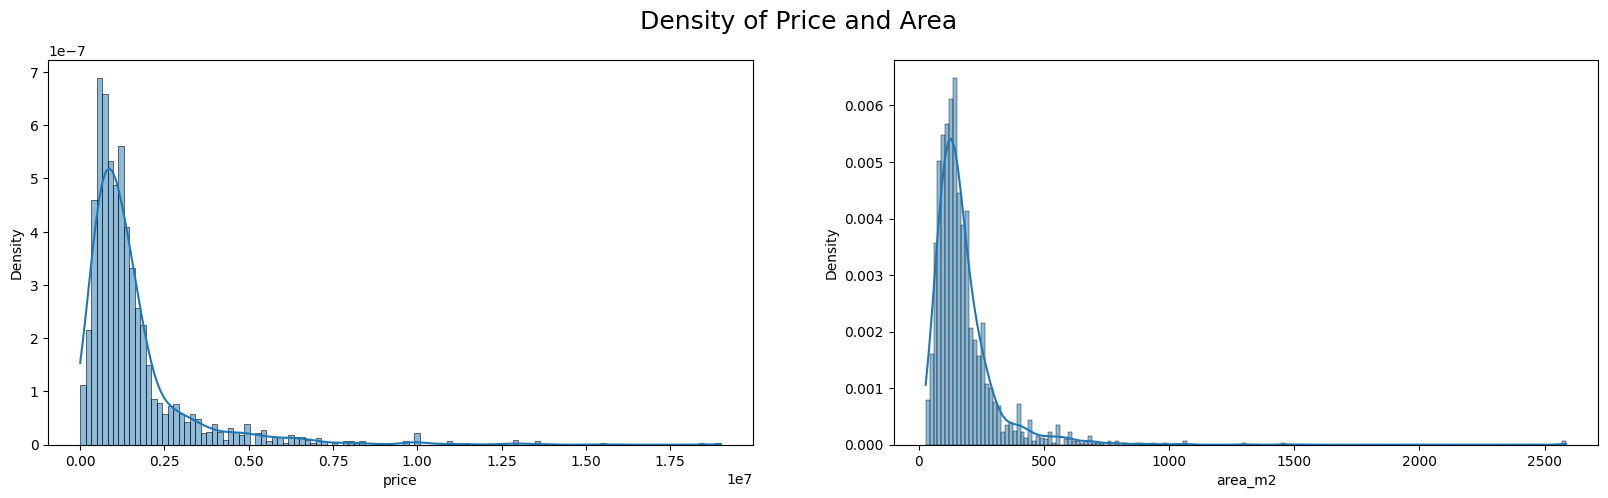

In [ ]:
fig, ax = plt.subplots(1, 2,figsize=(20,5))

sns.histplot(data=df, x='price', kde=True, stat='density', ax=ax[0])
sns.histplot(data=df, x='area_m2', kde=True, stat='density', ax=ax[1])

fig.suptitle('Density of Price and Area', fontsize=18)
fig.show();

In [ ]:
fig = px.histogram(df, x="price",
                   marginal="box",
                   hover_data=df.columns)
fig.update_layout(
    font={"size":17},
    title_text="Price Distribution on Histogram and Boxplot", 
    title_x=0.5,
    )

fig.show()

---
**Understanding Box Plots**

<center><img src="https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png" width="700" style="background:none; border:none; box-shadow:none;" /></center>

In [ ]:
fig = px.box(df, x="type", y="price") 
fig.update_layout(
    font={"size":17},
    title_text="Boxplot Distribution Between Property Types", 
    title_x=0.5,
    )
fig.update_xaxes(tickangle=-45)
fig.show()

## Scatter Plot

In [ ]:
fig = px.scatter(df, x="area_m2", y="price", color='type')

fig.update_layout(
    font={"size":17},
    title_text="Correlation Between Property Area And Its Price", 
    title_x=0.5,
)

fig.show()

In [ ]:
# EXERCISE 4
# Plot a scatter plot with the correlation between price and number of roooms

fig = px.scatter(df, x="room_num", y="price", color='type') #<-- Your code here

fig.update_layout(
    font={"size":17},
    title_text="Correlation Between Property Number Of Rooms And Its Price", 
    title_x=0.5,
)

fig.show()

## Viewing Variable Correlations in a Heatmap

In [ ]:
corr_matrix = df.corr()
corr_matrix

<ipython-input-36-208d05607fc1>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,price,room_num,area_m2,floors_num,year_built,last_refurbishment,price_sqm,lat,lon
price,1.000000,0.459494,0.628449,0.124929,-0.083184,-0.012039,0.670871,-0.047284,-0.133427
room_num,0.459494,1.000000,0.752591,0.133895,-0.371860,-0.238949,0.012346,0.087060,-0.099722
area_m2,0.628449,0.752591,1.000000,0.085317,-0.231394,-0.101652,0.065146,-0.009217,-0.049227
floors_num,0.124929,0.133895,0.085317,1.000000,-0.081857,-0.055389,0.071818,0.125379,0.061658
year_built,-0.083184,-0.371860,-0.231394,-0.081857,1.000000,0.662616,0.129338,-0.136419,0.100956
last_refurbishment,-0.012039,-0.238949,-0.101652,-0.055389,0.662616,1.000000,0.102984,-0.048500,-0.048035
price_sqm,0.670871,0.012346,0.065146,0.071818,0.129338,0.102984,1.000000,-0.006141,-0.064911
lat,-0.047284,0.087060,-0.009217,0.125379,-0.136419,-0.048500,-0.006141,1.000000,-0.092338
lon,-0.133427,-0.099722,-0.049227,0.061658,0.100956,-0.048035,-0.064911,-0.092338,1.000000


In [ ]:
def trunc(values, decs=0):
    return np.trunc(values*10**decs)/(10**decs)

trimask = np.triu(np.ones_like(corr_matrix, dtype=bool))


fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = corr_matrix.columns,
        y = corr_matrix.index,
        z = np.array(corr_matrix),
        text=trunc(np.array(corr_matrix), decs=2), texttemplate="%{text}",
        colorscale = 'RdBu', ygap=1, xgap=1
    )
)

fig.update_layout(
    title_text="Correlation Heatmap", 
    title_x=0.5,
    width=1000, 
    height=600,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    yaxis_autorange='reversed'
)

fig.show()

# More Visualizations

## Mapping

In [ ]:
fig = px.scatter_mapbox(
    df, 
    lat="lat", 
    lon="lon", 
    hover_name="price", 
    color="canton", 
    size="price",
    zoom=7, 
    center={"lat":46.8182, "lon":8.2275}
)

fig.update_layout(
    mapbox_style="carto-positron", 
    margin={"r":0,"t":0,"l":0,"b":0}, 
    height=600, 
    font={"size":17}
)

fig.show()

In [ ]:
# EXERCISE 5
df_map = df[df['price']<5000000]

fig = px.scatter_mapbox(
    df_map, 
    lat="lat", 
    lon="lon", 
    hover_name="price", 
    color="price", #<--- Your code here
    zoom=7, 
    center={"lat":46.8182, "lon":8.2275},
)

fig.update_layout(
    mapbox_style="carto-positron", 
    margin={"r":0,"t":0,"l":0,"b":0},
    height=600, 
    font={"size":17}
)

fig.show()

# Intro to Machine Learning

## Further Data Cleaning

---
In order to do feed the data to the Machine Learning algorithm

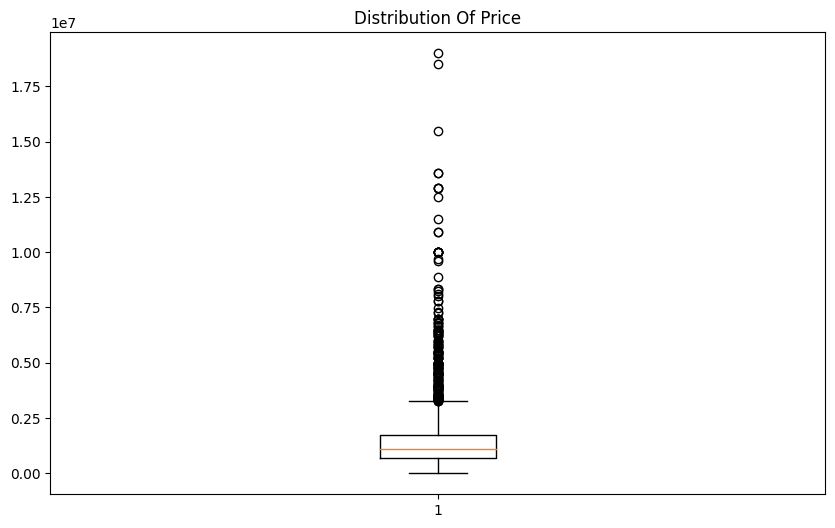

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Distribution Of Price')
ax.boxplot(df['price'])
fig.show();

In [ ]:
df = df[df['price']< 5000000].reset_index(drop=True)
#df = df[~df["year_built"].isna()]
df.drop(['lat', 'lon', 'price_sqm'], axis=1, inplace=True, errors='ignore')
df

,price,type,room_num,floor,area_m2,floors_num,year_built,last_refurbishment,zip_code,city,canton
0,1235000,Apartment,2.5,GF,138.0,4,2015.0,2018.0,8914,Aeugst,Kanton Zürich
1,650000,Apartment,4.5,1,121.0,1,1987.0,2021.0,6982,Agno,Ticino
2,1062900,Apartment,2.5,1,63.0,1,NaN,NaN,6816,Bissone,Ticino
3,1125500,Attic flat,2.5,3,63.0,1,NaN,NaN,6816,Bissone,Ticino
4,2180700,Apartment,3.5,2,125.0,1,NaN,NaN,6816,Bissone,Ticino
...,...,...,...,...,...,...,...,...,...,...,...
1928,695000,Bifamiliar house,4.5,GF,144.0,1,2022.0,2022.0,1994,Aproz,Canton du Valais
1929,695000,Bifamiliar house,4.5,GF,144.0,1,2022.0,2022.0,1994,Aproz,Canton du Valais
1930,695000,Row house,4.5,GF,144.0,1,2022.0,2022.0,1994,Aproz,Canton du Valais
1931,695000,Bifamiliar house,4.5,GF,144.0,1,2022.0,2022.0,1994,Aproz,Canton du Valais


---
Machine learning is the process of teaching a computer to learn patterns from data and then to apply those patterns to make preditions on new data. In traditional programming, you write rules to tell the computer exactly what to do. For example, if you want to write a program that converts miles to kilometers, you would write a function that computes the following equation:

<span>
<img src="https://drive.google.com/uc?id=1aa50Dd83JwO7x_SOWbNckj2ThBOfVdeb" width="40%"/>


But in ML, instead of writing the rule, you provide the computer a lot of examples of input data as well as the desired output, say many samples miles to kilometer conversion data. Then let the computer learn the rule itself.


<img src="https://drive.google.com/uc?id=1sj2IeZGi9RI6VH-ZvFpFdS2fC6e3XO0R" width="40%"/>
</span>

But there are many cases where the rules are not that simple. For example, this very dataset of housing prices takes into consideration many variables, and it would be very complicated to write a formula ourselves.

ML is ideal for these types of problems, where you have lots of data that have complex relationships that would be very difficult for humans to manually create rules for.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn import metrics
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor

---
Don't worry too much about the following code. There are several technicalities better saved for another time. The only important thing to understand is that we separate our data from the independent (x) and dependent variables (y), since we want the ML algorithm to learn the patterns from the independent variables that give the target output.

In [ ]:
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
numeric_features = X_train.select_dtypes(exclude=['object']).columns.tolist()
categorical_transformer = Pipeline(steps=[
                                          ("onehot", OneHotEncoder(handle_unknown="ignore"))
                                          ])
numeric_transformer = Pipeline(steps=[
                                      ("knn_imputer", KNNImputer(n_neighbors=5)),
                                      ("scaler", MinMaxScaler())
                                      ])
preprocessor = ColumnTransformer(transformers=[
                                               ("num", numeric_transformer, numeric_features),
                                               ("cat", categorical_transformer, categorical_features)
                                               ])

model = RandomForestRegressor(n_estimators=1000)

pipeline_model = Pipeline(steps=[
                              ("pre_process", preprocessor), 
                              ("model", model)
                              ])

pipeline_model.fit(X_train, y_train)

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['room_num', 'area_m2',
                                                   'floors_num', 'year_built',
                                                   'last_refurbishment']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['type', 'floor', 'zip_code',
                                                   'city', 'canton'])])),
                ('model', RandomForestRegressor(n_estimators=1000))])

In [ ]:
pred = pipeline_model.predict(X_test)

print('MAE', metrics.mean_absolute_error(y_test, pred))
print('R2 Score', metrics.r2_score(y_test, pred))

MAE 321342.4960401478
R2 Score 0.65731409210898


---
Enter the values of a property you would like to predict its price for:

In [ ]:
# EXERCISE 6

target_property = {
    'type' : ['Apartment'],
    'room_num' : [2.5],
    'floor' : ["2"],
    'area_m2' : [80],
    'floors_num' : [1],
    'year_built' : [1990],
    'last_refurbishment' : [2002],
    'zip_code' : ["8004"],
    'city' : ["Zürich"],
    'canton' : ["Kanton Zürich"],
}

to_predict = pd.DataFrame(target_property)
to_predict[['area_m2', 'year_built', 'last_refurbishment']] = to_predict[['area_m2', 'year_built', 'last_refurbishment']].astype(float)
to_predict

,type,room_num,floor,area_m2,floors_num,year_built,last_refurbishment,zip_code,city,canton
0,Apartment,2.5,2,80.0,1,1990.0,2002.0,8004,Zürich,Kanton Zürich


In [ ]:
pred = pipeline_model.predict(to_predict)
print(f"The value of the property using the trained machine learning algorithm is of {round(pred[0])} CHF")

The value of the property using the trained machine learning algorithm is of 840710 CHF


---
Congratulations! 

- You learned how to start a Data Science project.
- You learned how to do data wrangling to clean the data.
- You learned how to do exploratory data analysis and visualize insights with plots.
- And you trained a Machine Learning Algorithm that allows user to get a predicted price of a property based on previous data.

It feels awesome to know all these tools.

From the Constructor Learning team, we thank you for your participation!


## Solutions to the exercises:


Exercise 1: 
```
df['floor'] = df['floor'].fillna("GF")
```

Exercise 2:
```
df['last_refurbishment'] = df['last_refurbishment'].fillna(df['year_built'])
```

Exercise 3:
```
latitude = zip_info["latitude"]  #<-- Make this EXERCISE
longitude = zip_info["longitude"] #<-- Make this EXERCISE
```

Exercise 4:
```
fig = px.scatter(df, x="room_num", y="price", color='type')
```

Exercise 5:
```
fig = px.scatter_mapbox(
    df_map, 
    lat="lat", 
    lon="lon", 
    hover_name="price", 
    color="price", 
    zoom=7, 
    center={"lat":46.8182, "lon":8.2275},
)
```